# **DL Project Submission-2.2**
# **Ankita Veerabahu - 200968266**
## Batch-4

<br>

---




## 1. Defining the problem statement - 


- Facial expression recognition is an intuitive reflection of a person's mental state, which contains rich emotional information.
- Using Deep Learning, facial emotion recognition (FER) can be implemented for analysing sentiments by different sources.
- The task here is to take the image of a face as input and classify it as accurately as possible into the correct emotion category it belongs to.
- A set of 7 standard emotions will be considered
- Only if this is successfully achieved, we may go ahead with building a recommender system around the output received. 


<br>



---

<br>

## 2. Metadata -  
### Dataset - FER-2013

- The FER-2013 data set was created by Goodfellow et al. for the ICML 2013 Workshop on Challenges in Representation Learning and introduced on the Kaggle platform to support development of better FER systems.
- The data consists of 48x48 pixel grayscale images of faces.
- There are a total of 35,887 examples
- The facial expression is classified into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
- The training set consists of 28,709 examples and the public test set consists of 7,178 examples


<br>

---

<br>

## 3. Project Objectives -
 
-  Using Deep Learning, facial emotion recognition (FER) can be implemented for analysing sentiments by different sources,
such as pictures and videos. For decades, decoding such emotion expressions has been a research interest in many domains.
- It can be used in various fields like psychology, Customer behaviour  analysis, education, public safety, crime detection and advertising etcetra.
- This project aspires to tackle the problem of identifying facial expressions on human faces and categorizing them under various common emotions.
- Depending on the output, further implementation into other ML systems can be done.

<br>



---



## 4. Exploratory Data Analysis

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
import keras
import tensorflow as tf
import pydot
import skimage

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.layers import *
from tensorflow.python.lib.io import file_io
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model, Model, Sequential
from keras.utils.layer_utils import get_source_inputs
from keras.utils import plot_model
from sklearn.metrics import *
from keras.layers import Input, Flatten, Dense, Activation, Conv2D, MaxPool2D, BatchNormalization, Dropout, MaxPooling2D
from skimage.transform import rescale, resize
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.applications import VGG16
from keras.applications import Xception
from keras.applications.mobilenet_v2 import MobileNetV2


**Importing the dataset from Kaggle**

Upload the "Kaggle.json" file which contains your Kaggle account key

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download msambare/fer2013

 38% 23.0M/60.3M [00:00<00:00, 237MB/s]
100% 60.3M/60.3M [00:00<00:00, 336MB/s]


In [ ]:
! unzip fer2013.zip 

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

**Access the train and test directories from the unzipped folder**

In [ ]:
train_dir = 'train/'
test_dir = 'test/'

In [ ]:
cwd = os.getcwd() 
print("Current working directory:", cwd) 

Current working directory: /content


**Checking number of classes**

In [ ]:
classes = len(os.listdir("train/"))
print("Number of classes is: ", classes)
# path = train_dir
# dir_list = os.listdir(path) 
# dir_list

Number of classes is:  7


**Checking class names**

In [ ]:
dir_list = os.listdir(train_dir) 
print("Files and directories in train folder :") 
print(dir_list) 

dir_list = os.listdir(test_dir) 
print("\nFiles and directories in test folder :") 
print(dir_list) 

Files and directories in train folder :
['sad', 'fear', 'angry', 'surprise', 'neutral', 'happy', 'disgust']

Files and directories in test folder :
['sad', 'fear', 'angry', 'surprise', 'neutral', 'happy', 'disgust']


**Finding number of images in each class, in the training and testing set**

In [ ]:
print("Train Set :")
total_train_images=0
train_count = []
for folder in os.listdir(train_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(train_dir+folder)), "images")
    total_train_images+= len(os.listdir(train_dir+folder))
    train_count.append(len(os.listdir(train_dir+folder)))
    

test_count = []
total_test_images=0
print("\nTest Set :")
for folder in os.listdir(test_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(test_dir+folder)), "imagess")
    total_test_images+= len(os.listdir(test_dir+folder))
    test_count.append(len(os.listdir(test_dir+folder)))

print("\nTotal train images = ", total_train_images, "\nTotal test images = ", total_test_images)

Train Set :
sad folder contains		 4830 images
fear folder contains		 4097 images
angry folder contains		 3995 images
surprise folder contains		 3171 images
neutral folder contains		 4965 images
happy folder contains		 7215 images
disgust folder contains		 436 images

Test Set :
sad folder contains		 1247 imagess
fear folder contains		 1024 imagess
angry folder contains		 958 imagess
surprise folder contains		 831 imagess
neutral folder contains		 1233 imagess
happy folder contains		 1774 imagess
disgust folder contains		 111 imagess

Total train images =  28709 
Total test images =  7178


**Total number of images**

In [ ]:
total_images=total_test_images+total_train_images
total_images

35887

**Dimensions of each image**

In [ ]:
#checking size of one image
img = load_img(("train/angry/" + os.listdir("train/angry/")[1]))
width, height=img.size
width, height

(48, 48)

**Visualizing the number of images available for each class**

In [ ]:
row, col = width, height
classes = 7

def count_exp(path, sets):
    dict_a= {}
    for expression in os.listdir(path):
        dirs = path + expression
        # print(dirs)
        dict_a[expression] = len(os.listdir(dirs))
    df = pd.DataFrame(dict_a, index=[sets])
    return df
train_count = count_exp(train_dir, "train")
test_count = count_exp(test_dir, "test")

**Plot of training data distribution**

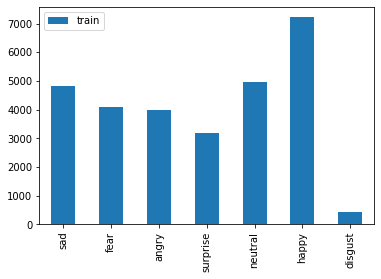

In [ ]:
train_count.transpose().plot(kind='bar')

**Plot of testing data distribution**

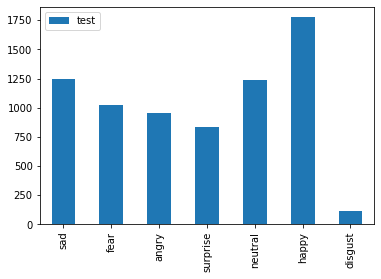

In [ ]:
test_count.transpose().plot(kind='bar')

**Plotting one image of every class**

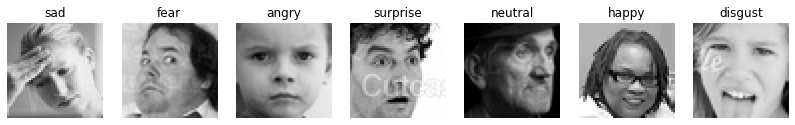

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

## 5. Preprocessing

**Using ImageDataGenerator, we perform data augmentation.**
 - Normalization is done by rescaling the training and testing images. 
 - Training images are flipped
 - A validation split of 80-20 is made.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   validation_split=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

**The image sets are now ready to be used in the CNN model**

In [ ]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

validation_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='validation')

test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**The class labels are encoded for the classification task**

In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Some helper functions

In [ ]:
print(keras.__version__)
print(tf.__version__)

2.9.0
2.9.2


**Function for tracking training time of the models**

In [ ]:
def model_running_time(start , end):
    hours = int((end-start)/3600)
    mins = int(((end-start)/60)%60)
    secs = int((end - start)%3600)
    print("Model Run Time: ")
    print(hours,":",mins,":",secs)
    return (hours,mins,secs)

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = validation_set.n // validation_set.batch_size

**Defining model callback for saving weights at checkpoints**

In [ ]:
checkpoint_path = 'saved_models/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_freq='epoch')

**Defining Metrics that will be used for evaluation** 
- Accuracy
- Loss (categorical crossentropy)
- Precision
- Recall
- AUC
- f1 score

In [ ]:
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      # tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

# CNN models

### **CNN-1**
- CNN with 5 convolution layers and 2 dense layers. The CONV2D layers use gradually increasing dropout rate, l2 regularization and batch normalization, with 'elu' activation function, ADAM optimizer and MaxPooling

In [ ]:
num_classes = classes #(7)
weight_decay = 1e-3

def model1():
    model = tf.keras.models.Sequential()

    model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(48,48,1)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(128, activation="linear"))
    model.add(Activation('elu'))
    model.add(Dense(num_classes, activation='softmax'))

    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0003), metrics=[METRICS, 'accuracy'])
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        1088      
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        65600     
                                                                 
 activation_13 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                     

**TRAINING MODEL CNN-1**

In [ ]:
start = time.time()

save1=model.fit(x=training_set,
                 validation_data=validation_set,
                 epochs=20,
                 callbacks=[cp_callback],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

end = time.time()

Epoch 1/20
448/448 [==============================] - 44s 73ms/step - loss: 2.2051 - precision: 0.4530 - recall: 0.0554 - auc: 0.6943 - f1_score: 0.0953 - accuracy: 0.2984 - val_loss: 2.3614 - val_precision: 0.3963 - val_recall: 0.0637 - val_auc: 0.6779 - val_f1_score: 0.1086 - val_accuracy: 0.2691
Epoch 2/20
448/448 [==============================] - 32s 71ms/step - loss: 1.9779 - precision: 0.6487 - recall: 0.1217 - auc: 0.7606 - f1_score: 0.2020 - accuracy: 0.3720 - val_loss: 1.9068 - val_precision: 0.6068 - val_recall: 0.2124 - val_auc: 0.7843 - val_f1_score: 0.3135 - val_accuracy: 0.4017
Epoch 3/20
448/448 [==============================] - 31s 69ms/step - loss: 1.8459 - precision: 0.6824 - recall: 0.1821 - auc: 0.7936 - f1_score: 0.2848 - accuracy: 0.4162 - val_loss: 1.7382 - val_precision: 0.7098 - val_recall: 0.2203 - val_auc: 0.8210 - val_f1_score: 0.3344 - val_accuracy: 0.4547
Epoch 4/20
448/448 [==============================] - 30s 68ms/step - loss: 1.7211 - precision: 0.70

#### Max validation accuracy of Model-1 = 0.6255
#### Min validation loss of Model-1 = 1.1655

In [ ]:
_ = model_running_time(start,end)

Model Run Time: 
0 : 12 : 749


**Plotting the accuracy and loss**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


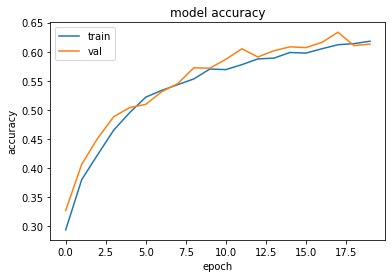

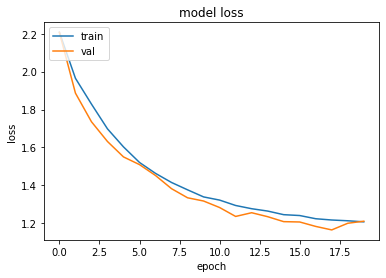

In [ ]:
print(save1.history.keys())

# summarize history for accuracy
plt.plot(save1.history['accuracy'])
plt.plot(save1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(save1.history['loss'])
plt.plot(save1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
new_model = model1()

**Evaluating performance on test data**

In [ ]:
loss, precision, recall, auc, f1_score, accuracy = model.evaluate(test_set)
print("Accuracy = ", accuracy)
print("Loss = ", loss)
print("Precision = ", precision)
print("Recall = ", recall)
print("f1_score = ", f1_score)
print("AUC = ", auc)

113/113 [==============================] - 4s 34ms/step - loss: 1.3314 - precision: 0.7106 - recall: 0.4224 - auc: 0.8903 - f1_score: 0.5290 - accuracy: 0.5772
Accuracy =  0.5771802663803101
Loss =  1.3313846588134766
Precision =  0.7105695009231567
Recall =  0.4224017858505249
f1_score =  0.529042661190033
AUC =  0.8902716040611267


#### Evaluation of CNN-1
* Accuracy =  0.5771802663803101
* Loss =  1.3313846588134766
* Precision =  0.7105695009231567
* Recall =  0.4224017858505249
* f1_score =  0.529042661190033
* AUC =  0.8902716040611267

### **CNN-2** 
- CNN with 3 convolution layers and 4 dense layers. The CONV2D layers use constant dropout of 0.2, l2 regularization and batch normalization, with 'ReLU' activation function, ADAM optimizer and MaxPooling

In [ ]:
## create  a model
num_classes = 7
weight_decay = 1e-3

def model2():
    model = keras.Sequential([
        keras.layers.Input(shape=(48,48,1)),

        keras.layers.Conv2D(filters=64 , kernel_size= (4,4), strides=(1,1) ,padding='valid' , kernel_regularizer=keras.regularizers.l2(weight_decay),activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        
        keras.layers.Conv2D( filters=128 , kernel_size=(4,4) , strides = (1,1) , padding='valid' , activation='relu' , kernel_regularizer=keras.regularizers.l2(weight_decay)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.MaxPooling2D(),
        
        keras.layers.Conv2D( filters = 128 , kernel_size=(4,4) , strides = (1,1) , padding='valid' , activation='relu' , kernel_regularizer=keras.regularizers.l2(weight_decay)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.MaxPooling2D(),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(units=256 , activation='relu'),
        keras.layers.Dense(units=128 , activation='relu'),
        keras.layers.Dense(units=128, activation='elu'),
        
        keras.layers.Dense(units=num_classes , activation='softmax')
    ])
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=
        Adam(0.0003), 
        metrics=[METRICS, 'accuracy'])
    
    return model

In [ ]:
model = model2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 45, 45, 64)        1088      
                                                                 
 dropout_3 (Dropout)         (None, 45, 45, 64)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 45, 45, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 42, 42, 128)       131200    
                                                                 
 batch_normalization_4 (Batc  (None, 42, 42, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 42, 42, 128)      

**TRAINING MODEL CNN-2**

In [ ]:
start = time.time()

save2=model.fit(x=training_set,
                 validation_data=validation_set,
                 epochs=50,
                 callbacks=[cp_callback],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

end = time.time()

Epoch 1/50
448/448 [==============================] - 35s 74ms/step - loss: 1.9026 - precision: 0.6591 - recall: 0.1941 - auc: 0.7904 - f1_score: 0.1347 - accuracy: 0.3265 - val_loss: 2.5837 - val_precision: 0.1831 - val_recall: 0.1166 - val_auc: 0.6300 - val_f1_score: 0.1423 - val_accuracy: 0.1829
Epoch 2/50
448/448 [==============================] - 32s 72ms/step - loss: 1.6632 - precision: 0.6914 - recall: 0.1784 - auc: 0.7978 - f1_score: 0.2800 - accuracy: 0.4190 - val_loss: 1.9889 - val_precision: 0.4563 - val_recall: 0.2347 - val_auc: 0.7558 - val_f1_score: 0.3088 - val_accuracy: 0.3627
Epoch 3/50
448/448 [==============================] - 32s 71ms/step - loss: 1.5240 - precision: 0.7279 - recall: 0.2418 - auc: 0.8337 - f1_score: 0.3604 - accuracy: 0.4691 - val_loss: 1.6671 - val_precision: 0.5600 - val_recall: 0.3188 - val_auc: 0.8198 - val_f1_score: 0.4051 - val_accuracy: 0.4429
Epoch 4/50
448/448 [==============================] - 31s 70ms/step - loss: 1.4270 - precision: 0.73

#### Max validation accuracy of CNN-2 = 0.8051
#### Min validation loss of CNN-2 = 0.6592 

**Plotting the accuracy and loss**

dict_keys(['loss', 'precision', 'recall', 'auc', 'f1_score', 'accuracy', 'val_loss', 'val_precision', 'val_recall', 'val_auc', 'val_f1_score', 'val_accuracy'])


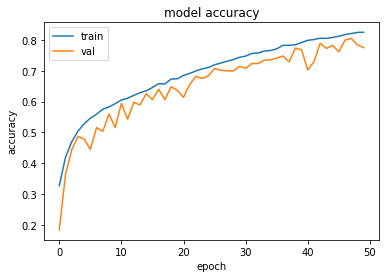

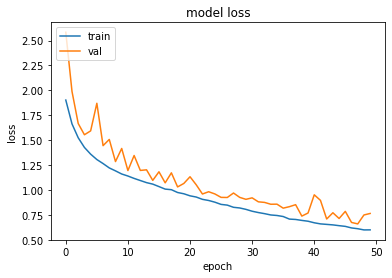

In [ ]:
print(save2.history.keys())
# summarize history for accuracy

plt.plot(save2.history['accuracy'])
plt.plot(save2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(save2.history['loss'])
plt.plot(save2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
new_model2=model2()

**Evaluating performance on test data**

In [ ]:
new_model2.load_weights(checkpoint_path)

loss, precision, recall, auc, f1_score, accuracy = new_model2.evaluate(test_set)
print("Accuracy = ", accuracy)
print("Loss = ", loss)
print("Precision = ", precision)
print("Recall = ", recall)
print("f1_score = ", f1_score)
print("AUC = ", auc)

113/113 [==============================] - 4s 30ms/step - loss: 1.6853 - precision: 0.7147 - recall: 0.6568 - auc: 0.9185 - f1_score: 0.6105 - accuracy: 0.6105
Accuracy =  0.6104764342308044
Loss =  1.6852705478668213
Precision =  0.7147083878517151
Recall =  0.6567500233650208
f1_score =  0.6104795336723328
AUC =  0.9185266494750977


#### Evaluation of CNN-2
* Accuracy =  0.6104764342308044
* Loss =  1.6852705478668213
* Precision =  0.71470838785171517
* Recall =  0.6567500233650208
* f1_score =  0.6567500233650208
* AUC =  0.9185266494750977

# Xception model
- Xception is a deep convolutional neural network architecture that involves Depthwise Separable Convolutions. After entry flow, data goes through the middle flow which is repeated eight times, and finally through the exit flow. All convolution layers are followed by batch normalization.
- This model follows the baseline acrhitecture with a GAP layer and 3 dense layers with l2 regularization, ADAM and droupout.

**Defining model callback for saving weights at checkpoints**

In [ ]:
checkpoint_path3 = 'saved_Xception_models/cp.ckpt'
checkpoint_dir3 = os.path.dirname(checkpoint_path3)

cp_callback3 = keras.callbacks.ModelCheckpoint(checkpoint_path3,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_freq='epoch')

### **Defining Xception Transfer learning model**

In [ ]:
def model_Xception(dropout_rate, lr):
    main_input = layers.Input([48, 48, 1])

    x = layers.BatchNormalization()(main_input)

    base_model = Xception(weights=None, input_tensor=x, include_top=False)

    flatten = layers.GlobalAveragePooling2D()(base_model.output)
    # flatten = layers.Flatten()(base_model.output)

    fc = Dense(2048, activation='relu',
               kernel_regularizer=regularizers.l2(0.001),
               bias_regularizer=regularizers.l2(0.001),
               )(flatten)
    fc = Dropout(dropout_rate)(fc)
    fc = Dense(2048, activation='relu',
               kernel_regularizer=regularizers.l2(0.001),
               bias_regularizer=regularizers.l2(0.001),
               )(fc)
    fc = Dropout(dropout_rate)(fc)

    predictions = Dense(classes, activation="softmax")(fc)

    model = keras.Model(inputs=main_input, outputs=predictions, name='xception')

    optimizer = keras.optimizers.Adam(lr)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=metrics=[METRICS, 'accuracy'])
    return model


In [ ]:
model3=model_Xception(0.5, 1e-3)
model3.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 48, 48, 1)   4           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 block1_conv1 (Conv2D)          (None, 23, 23, 32)   288         ['batch_normalization[0][0]']    
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 23, 23, 32)  128         ['block1_conv1[0][0]']    

**Using the same preprocessing pipeline**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   validation_split=0.2,
                                   horizontal_flip=True)

training_set3 = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

validation_set3 = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set3 = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**TRAINING Xception Model**

In [ ]:
ear = EarlyStopping(monitor='val_loss', min_delta=0, patience=6, verbose=0, mode='min', baseline=None,
                    restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)

start = time.time()

save3=model3.fit_generator(training_set3,
                    steps_per_epoch=28709// 128,
                    epochs=100,
                    callbacks=[ear, cp_callback3, reduce_lr],
                    validation_data=validation_set3,
                    validation_steps=5741 // 128)

end = time.time()

model3.save('Xception_model.h5')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


224/224 [==============================] - 29s 96ms/step - loss: 2.7416 - precision: 0.6990 - recall: 0.3296 - auc: 0.8262 - f1_score: 0.0620 - accuracy: 0.2822 - val_loss: 2.0180 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6344 - val_f1_score: 0.0000e+00 - val_accuracy: 0.2525 - lr: 0.0010
Epoch 2/100
224/224 [==============================] - 22s 96ms/step - loss: 1.7273 - precision: 0.6836 - recall: 0.1175 - auc: 0.7515 - f1_score: 0.1956 - accuracy: 0.3533 - val_loss: 2.0473 - val_precision: 0.3133 - val_recall: 0.2337 - val_auc: 0.6590 - val_f1_score: 0.2671 - val_accuracy: 0.2440 - lr: 0.0010
Epoch 3/100
224/224 [==============================] - 22s 97ms/step - loss: 1.5659 - precision: 0.7306 - recall: 0.1752 - auc: 0.7904 - f1_score: 0.2801 - accuracy: 0.3949 - val_loss: 1.5043 - val_precision: 0.8050 - val_recall: 0.1701 - val_auc: 0.8060 - val_f1_score: 0.2790 - val_accuracy: 0.4077 - lr: 0.0010
Epoch 4/100
224/224 [==============================] - 21s

#### Max validation accuracy of Xception Model = 0.6669
#### Min validation loss of Xception Model = 0.9315

In [ ]:
_ = model_running_time(start,end)

Model Run Time: 
0 : 23 : 1422


**Plotting the accuracy and loss**

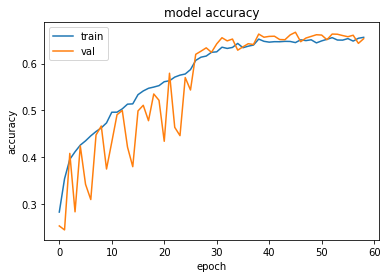

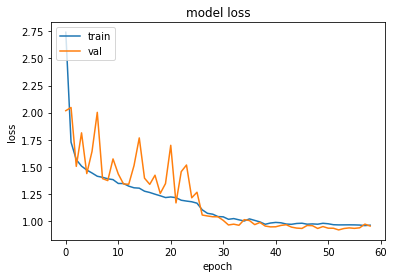

In [ ]:
# summarize history for accuracy
plt.plot(save3.history['accuracy'])
plt.plot(save3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(save3.history['loss'])
plt.plot(save3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Evaluating performance on test data**

In [ ]:
loss, precision, recall, auc, f1_score, accuracy = model3.evaluate_generator(test_set3)
print("Accuracy = ", accuracy)
print("Loss = ", loss)
print("Precision = ", precision)
print("Recall = ", recall)
print("f1_score = ", f1_score)
print("AUC = ", auc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy =  0.6270548701286316
Loss =  1.047756314277649
Precision =  0.743240475654602
Recall =  0.5016717910766602
f1_score =  0.5972176790237427
AUC =  0.9119510650634766


#### Evaluation of Xception Model
* Accuracy =  0.6270548701286316
* Loss =  1.047756314277649
* Precision =  0.743240475654602
* Recall =  0.5016717910766602
* f1_score =  0.5972176790237427
* AUC =  0.9119510650634766

In [ ]:
new_model = tf.keras.models.load_model('Xception_model.h5')

# VGGFace
- VGG-Face architecture is built on the VGG-16 architecture with facial descriptors for faster and efficient labelling of faces.
- On the baseline architecure, this model adds 2 dense layers, with ReLU activation, SGD Optimizer and dropout.

In [ ]:
!pip install keras-vggface
!pip install scikit-image
!pip install pydot

In [ ]:
pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.7 MB/s 


In [ ]:
pip install git+https://github.com/rcmalli/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-kic25ebw
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-kic25ebw


In [ ]:
pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, pyyaml, six, scipy, h5py, pillow, numpy
Required-by: 


**Defining constant values that will be used in the model**

In [ ]:
EPOCHS = 50
BS = 128
DROPOUT_RATE = 0.5
FROZEN_LAYER_NUM = 19
ADAM_LEARNING_RATE = 0.001
SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.0001
Resize_pixelsize = 197

**Defining model callback for saving weights at checkpoints**

In [ ]:
checkpoint_path2 = 'saved_vgg_models/cp.ckpt'
checkpoint_dir2 = os.path.dirname(checkpoint_path2)

cp_callback2 = keras.callbacks.ModelCheckpoint(checkpoint_path2,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_freq='epoch')

**Defining the VGGFace baseline model**

In [ ]:
from keras_vggface.vggface import VGGFace
# MAKE THIS CHANGE IN THE LINK GIVEN IN THE ERROR THAT OCCURS
#from keras.engine.topology import get_source_inputs
# to
# from keras.utils.layer_utils import get_source_inputs
# in keras_vggface/models.py.

vgg_notop = VGGFace(model='vgg16', include_top=False, input_shape=(Resize_pixelsize, Resize_pixelsize, 3), pooling='avg')
print(vgg_notop.summary())
last_layer = vgg_notop.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(4096, activation='relu', name='fc6')(x)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(1024, activation='relu', name='fc7')(x)

for i in range(FROZEN_LAYER_NUM):
    vgg_notop.layers[i].trainable = False
print(vgg_notop.get_layer('pool5').trainable)

**Adding layers**

In [ ]:
import tensorflow.python.keras.engine

out = Dense(7, activation='softmax', name='classifier')(x)

model3 = tf.keras.Model(vgg_notop.input, out)
print(model3.summary())

sgd = keras.optimizers.SGD(lr=SGD_LEARNING_RATE, momentum=0.9, decay=SGD_DECAY, nesterov=True)
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',mode='max',factor=0.5, patience=10, min_lr=0.00001, verbose=1)

model3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=[METRICS, 'accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 197, 197, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 197, 197, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 197, 197, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 98, 98, 64)        0         
                                                                 
 conv2_1 (Conv2D)            (None, 98, 98, 128)       73856     
                                                                 
 conv2_2 (Conv2D)            (None, 98, 98, 128)       147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 49, 49, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


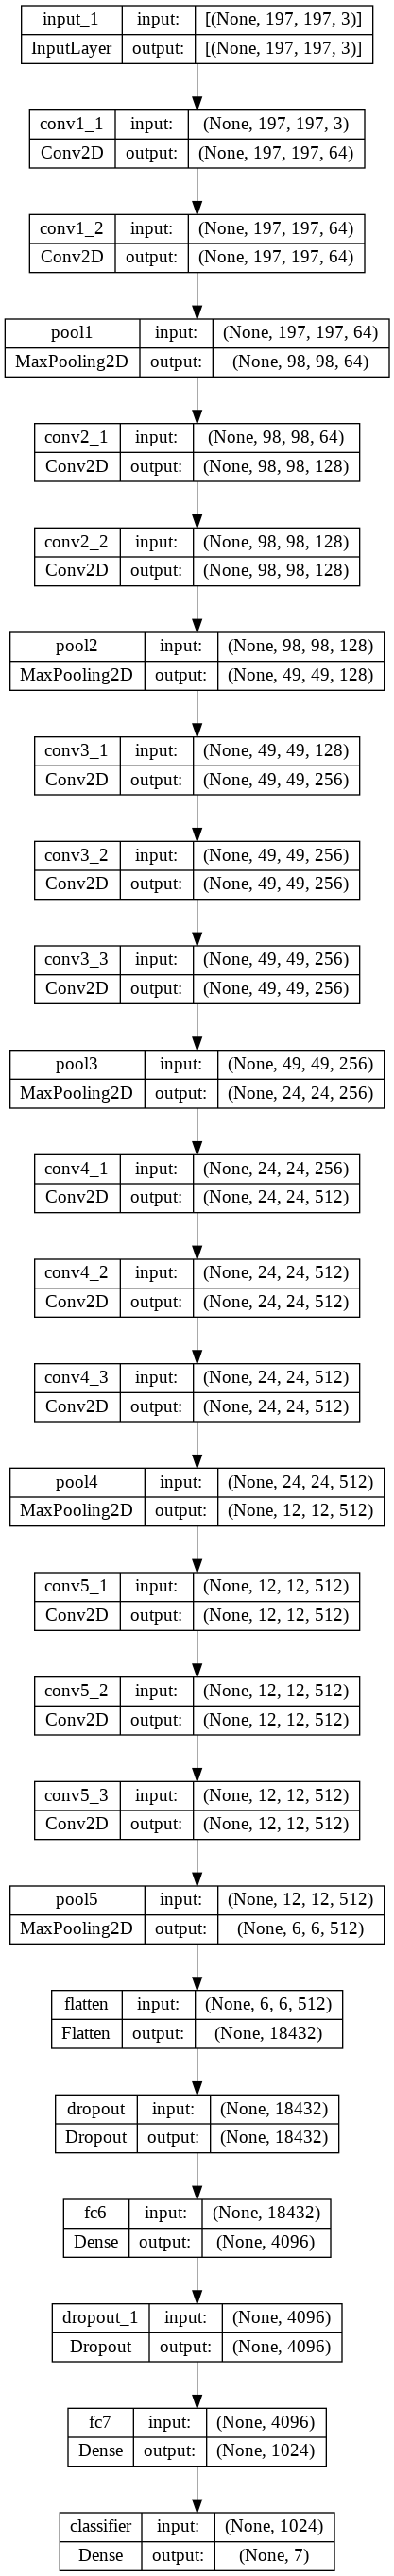

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model3,  show_shapes=True, show_layer_names=True)

**For this model we change the preprocessing pipeline slightly, to augment the images further.** <br>
- The images are normalized by rescaling, validation split is made etc
- The input image size is made larger 
- Color mode is changed from grayscale to rgb

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   validation_split=0.2,
                                   horizontal_flip=True)

training_set2 = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(197,197),
                                                shuffle=True,
                                                color_mode='rgb',
                                                class_mode='categorical')

validation_set2 = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(197,197),
                                                shuffle=True,
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set2 = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(197,197),
                                                shuffle=True,
                                                color_mode='rgb',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**TRAINING VGGFace Model**

In [ ]:
start=time.time()

save3 = model3.fit_generator( 
    generator = training_set2,
    validation_data=validation_set2, 
    steps_per_epoch=28709// BS,
    validation_steps=3509 // BS,
    shuffle=True,
    epochs=50,
    callbacks=[rlrop, cp_callback2]
    # use_multiprocessing=True
) 

end = time.time()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
224/224 [==============================] - 158s 653ms/step - loss: 1.4617 - precision: 0.7593 - recall: 0.1680 - auc: 0.8113 - f1_score: 0.2511 - accuracy: 0.4466 - val_loss: 1.1825 - val_precision: 0.7807 - val_recall: 0.3461 - val_auc: 0.8809 - val_f1_score: 0.4784 - val_accuracy: 0.5660 - lr: 0.0100
Epoch 2/50
224/224 [==============================] - 140s 625ms/step - loss: 1.2185 - precision: 0.7330 - recall: 0.3409 - auc: 0.8733 - f1_score: 0.4634 - accuracy: 0.5455 - val_loss: 1.1293 - val_precision: 0.7759 - val_recall: 0.3727 - val_auc: 0.8934 - val_f1_score: 0.5018 - val_accuracy: 0.5799 - lr: 0.0100
Epoch 3/50
224/224 [==============================] - 141s 628ms/step - loss: 1.1844 - precision: 0.7366 - recall: 0.3588 - auc: 0.8808 - f1_score: 0.4803 - accuracy: 0.5566 - val_loss: 1.0540 - val_precision: 0.7407 - val_recall: 0.4282 - val_auc: 0.9070 - val_f1_score: 0.5419 - val_accuracy: 0.6042 - lr: 0.0100
Epoch 4/50
224/224 [==============================] - 1

#### Max validation accuracy of VGG Model = 0.8634 
#### Min validation loss of VGG Model = 0.4622

In [ ]:
_ = model_running_time(start,end)

Model Run Time: 
2 : 1 : 92


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')


**Plotting the accuracy and loss**

dict_keys(['loss', 'precision', 'recall', 'auc', 'f1_score', 'accuracy', 'val_loss', 'val_precision', 'val_recall', 'val_auc', 'val_f1_score', 'val_accuracy', 'lr'])


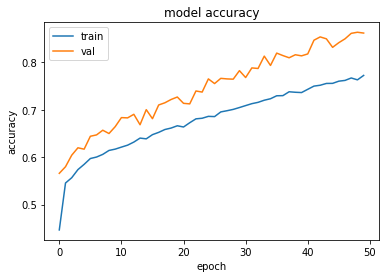

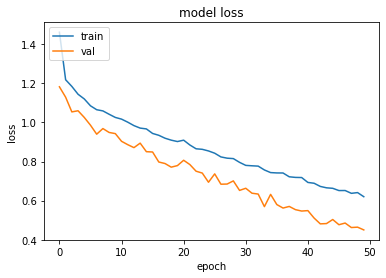

In [ ]:
print(save3.history.keys())

# summarize history for accuracy
plt.plot(save3.history['accuracy'])
plt.plot(save3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(save3.history['loss'])
plt.plot(save3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Evaluating performance on test data**

In [ ]:
loss, precision, recall, auc, f1_score, accuracy = model3.evaluate(test_set2)
print("Accuracy = ", accuracy)
print("Loss = ", loss)
print("Precision = ", precision)
print("Recall = ", recall)
print("f1_score = ", f1_score)
print("AUC = ", auc)

113/113 [==============================] - 28s 251ms/step - loss: 0.9192 - precision: 0.7626 - recall: 0.6105 - auc: 0.9318 - f1_score: 0.6777 - accuracy: 0.6818
Accuracy =  0.6818054914474487
Loss =  0.9191869497299194
Precision =  0.7626174688339233
Recall =  0.6104764342308044
f1_score =  0.6777135729789734
AUC =  0.9317629337310791


#### Evaluation of VGGFace Model
* Accuracy =  0.6818054914474487
* Loss =  0.9191869497299194
* Precision =  0.7626174688339233
* Recall =  0.6104764342308044
* f1_score =  0.6777135729789734
* AUC =  0.9317629337310791

# Evaluation

In [ ]:
data = [['CNN-1', 0.5771802663803101, 1.3313846588134766, 0.7105695009231567, 0.4224017858505249, 0.529042661190033, 0.8902716040611267 ],
        ['CNN-2', 0.6104764342308044, 1.6852705478668213, 0.7147083878517151, 0.6567500233650208, 0.6104795336723328, 0.9185266494750977],
        ['Xception', 0.6270548701286316, 1.047756314277649, 0.743240475654602, 0.5016717910766602, 0.5972176790237427, 0.9119510650634766],
        ['VGGFace', 0.6818054914474487, 0.9191869497299194, 0.7626174688339233, 0.6104764342308044, 0.6777135729789734, 0.9317629337310791]
       ]

test_metrics = pd.DataFrame(data, columns=['MODEL', 'Accuracy', 'Loss', 'Precision', 'Recall', 'f1_score', 'AUC'])

test_metrics

,MODEL,Accuracy,Loss,Precision,Recall,f1_score,AUC
0,CNN-1,0.577180,1.331385,0.710570,0.422402,0.529043,0.890272
1,CNN-2,0.610476,1.685271,0.714708,0.656750,0.610480,0.918527
2,Xception,0.627055,1.047756,0.743240,0.501672,0.597218,0.911951
3,VGGFace,0.681805,0.919187,0.762617,0.610476,0.677714,0.931763


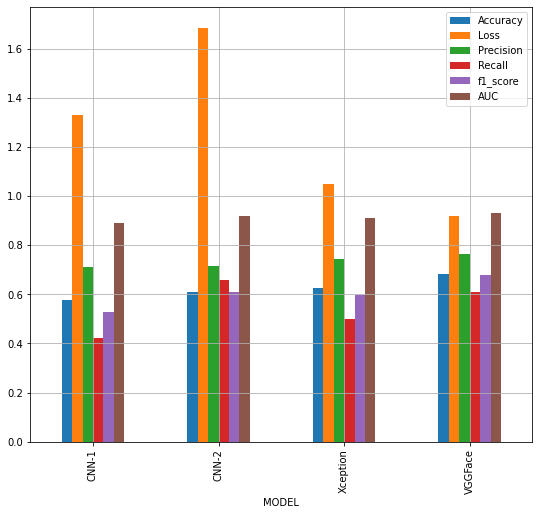

In [ ]:
test_metrics.plot(x="MODEL", y=['Accuracy', 'Loss', 'Precision', 'Recall', 'f1_score', 'AUC'], kind="bar",grid=True, figsize=(9, 8))

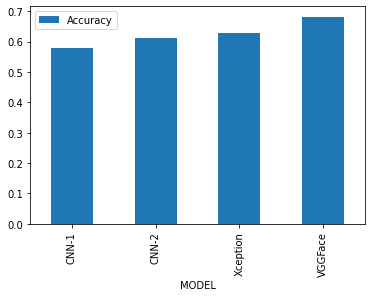

In [ ]:
test_metrics.plot(x="MODEL", y=['Accuracy'], kind="bar", figsize=(5, 6)) #, 'Loss', 'Precision', 'Recall', 'f1_score', 'AUC', 

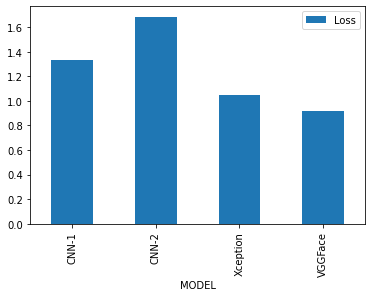

In [ ]:
test_metrics.plot(x="MODEL", y=['Loss'], kind="bar")

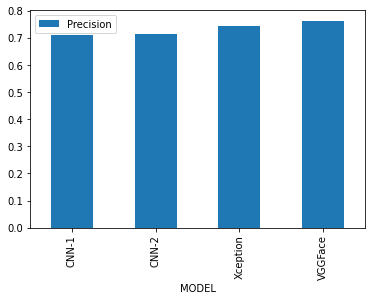

In [ ]:
test_metrics.plot(x="MODEL", y=['Precision'], kind="bar")

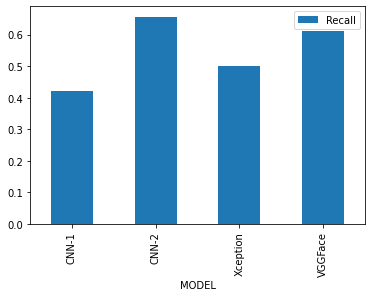

In [ ]:
test_metrics.plot(x="MODEL", y=['Recall'], kind="bar")

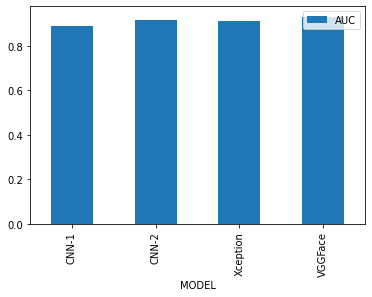

In [ ]:
test_metrics.plot(x="MODEL", y=['AUC'], kind="bar")

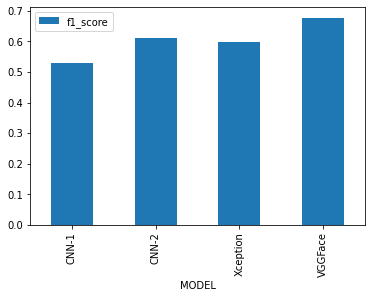

In [ ]:
test_metrics.plot(x="MODEL", y=['f1_score'], kind="bar")

##**Observations:**
- The CNN models were optmized after changing hyperparameters by trial and error over ADAM and AGD optimizers, ELU and ReLU activation functions and variation in number of dense and CONV2D layers.
- Among the 2 basic CNNs (i.e lightwight options) implemented, the CNN-2 model shows better performance in terms of Accuracy and Loss on test data compared to CNN-1
- The Xception model was implemented using ADAm optimizer with a GAP layer after baseline rchitecture after going through reseacrh papers which indicated improvement with these parameters.
- The model is more complicated than the simple CNNs but shows better Accuracy and Loss than both the CNNs on test data.
- The VGG-Face transfer learning model has much heavier implementation than the other models and takes much longer to train.
- My model could not converge fully, as I do not have sufficient computing power, although training for more than 2 hours still gives better testing Accuracy and Loss values than the other models.


<br>

---

<br>

##**Inference:**
### - For simple easier computation, CNN-2 model can be chosen for satisfactory results.
### - If computing power is not an issue, VGG-Face model will be chosen for best results.